# Analyse Exploratoire des Crédits Alloués

Ce Notebook contient une analyse exploratoire des données après la phase de Segmentation (`cash_allocated_data`).

Nous allons examiner les caractéristiques principales des données, visualiser les répartitions et identifier les tendances pertinentes.

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données de crédits alloués
cash_allocated_data_path = "../data/processed/cash_allocated_data.csv"
cash_allocated_data = pd.read_csv(cash_allocated_data_path)

# Aperçu des données
cash_allocated_data.head()

,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,Voice_Service_Score,SMS_Service_Score,Digital_Service_Score,Profile_Code,Weighted_Score,Segment,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
0,20230918,C1850294050,1,1,1,1551.85,1311.07,1,486.81,115.21,...,3,4,4,22344,39,Very Low,30.000000,260.000000,NaN,NaN
1,20231029,C2042071881,0,1,1,4759.05,267.29,1,77.07,110.88,...,3,4,1,34341,49,High,34.166667,326.666667,NaN,NaN
2,20231102,C1001545517,0,1,1,4813.52,24.33,0,83.86,7.84,...,3,3,2,43332,49,High,34.166667,326.666667,NaN,NaN
3,20231126,C1204243390,0,1,1,734.09,1018.34,0,284.10,18.31,...,3,3,3,32333,41,Very Low,30.833333,273.333333,NaN,NaN
4,20230801,C913434705,1,1,1,2166.61,255.10,1,464.50,120.56,...,3,3,3,33333,45,Medium,NaN,NaN,137.5,300.0


In [3]:
# Afficher les informations générales
cash_allocated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351748 entries, 0 to 351747
Columns: 115 entries, DATE_OF_THE_DAY to Cash_Roller_Over
dtypes: float64(37), int64(56), object(22)
memory usage: 308.6+ MB


In [4]:
# Statistiques descriptives
credit_columns = ['Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']
print("Statistiques descriptives des crédits alloués :")
cash_allocated_data[credit_columns].describe()

Statistiques descriptives des crédits alloués :


,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
count,175470.000000,175470.000000,176278.000000,176278.000000
mean,33.042303,308.676849,142.272646,308.484704
std,1.693934,27.102945,15.268279,27.143607
min,25.833333,193.333333,81.250000,200.000000
25%,32.083333,293.333333,130.000000,286.666667
50%,32.916667,306.666667,141.250000,306.666667
75%,34.166667,326.666667,152.500000,326.666667
max,41.250000,440.000000,208.750000,426.666667


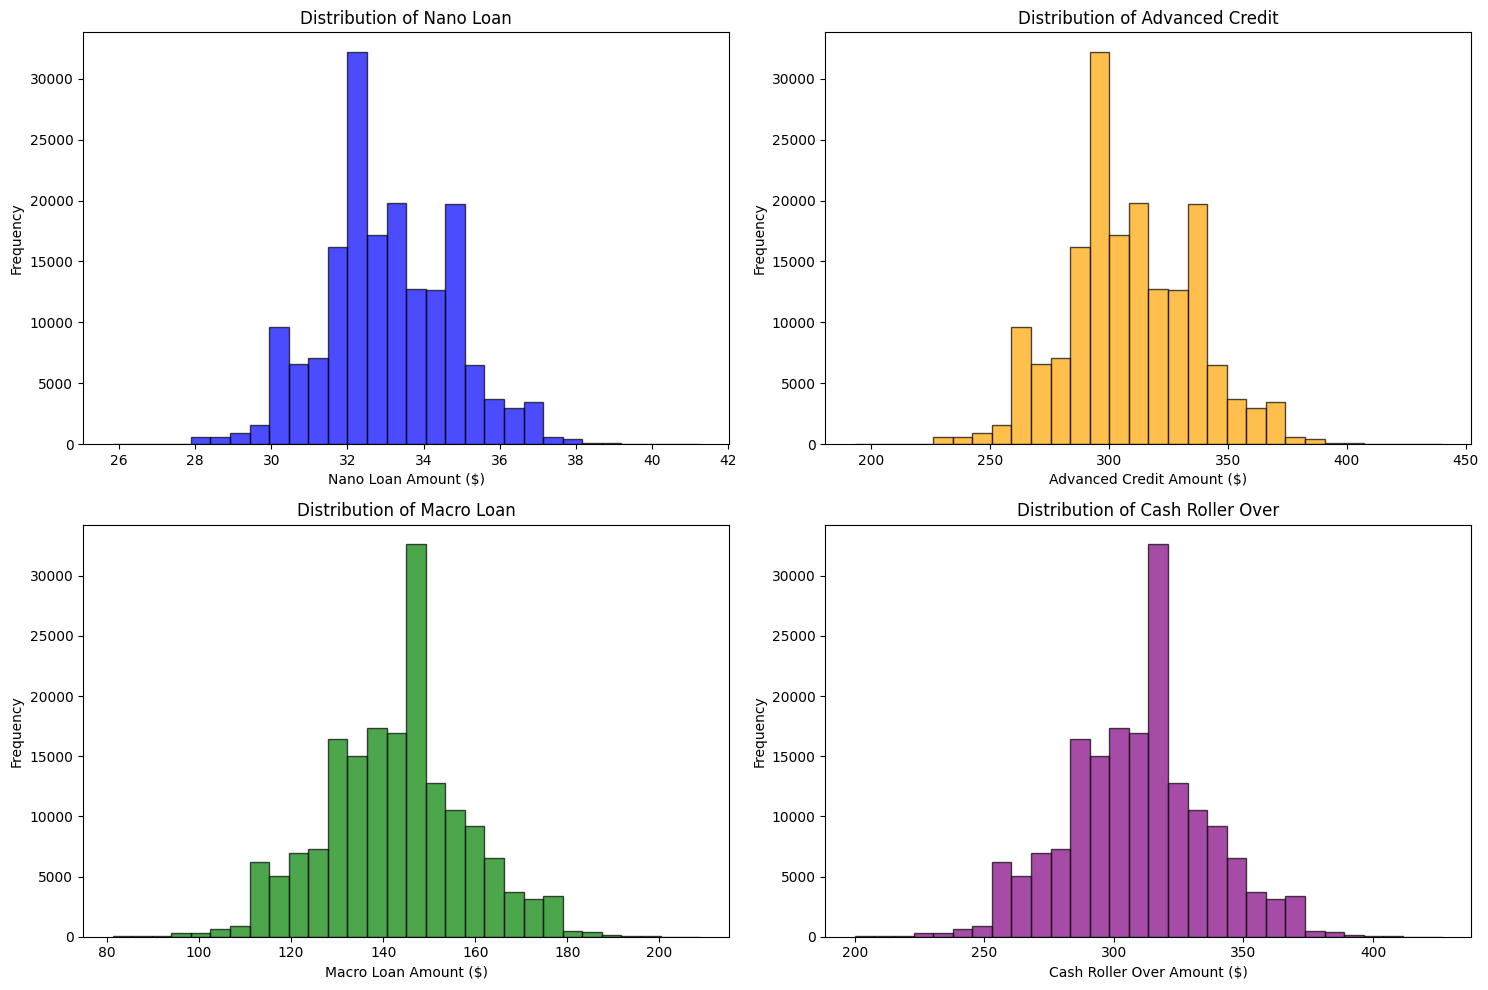

In [6]:
# Key tables and graphs for the report

# 1. Descriptive statistics for all four credit types
credit_stats = cash_allocated_data[['Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']].describe()

# 2. Comparison of credit amounts by Profile_Code
profile_credit_comparison = cash_allocated_data[['Profile_Code', 'Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']].sample(10)

# 3. Histograms for each credit type
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

credit_types = ['Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']
colors = ['blue', 'orange', 'green', 'purple']

for i, credit in enumerate(credit_types):
    axes[i].hist(cash_allocated_data[credit].dropna(), bins=30, edgecolor='black', alpha=0.7, color=colors[i])
    axes[i].set_title(f"Distribution of {credit.replace('_', ' ')}")
    axes[i].set_xlabel(f"{credit.replace('_', ' ')} Amount ($)")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [9]:
# Average Loan Amounts by Segment
average_loan_by_segment = cash_allocated_data.groupby('Segment')[credit_types].mean()
average_loan_by_segment

,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
Segment,,,,
High,33.684262,318.948192,148.156293,318.944520
Low,31.865107,289.841711,131.790440,289.849672
Medium,32.706436,303.302973,139.350462,303.289709
Very High,35.399147,346.386351,163.575108,346.355747
Very Low,30.474374,267.589978,119.282142,267.612697


In [10]:
# Sample Comparison of Credit Amounts by Profile Code
profile_credit_comparison

,Profile_Code,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
85119,43333,NaN,NaN,156.25,333.333333
241631,43344,NaN,NaN,167.50,353.333333
225317,33343,NaN,NaN,145.00,313.333333
123409,33335,NaN,NaN,145.00,313.333333
8531,32435,32.916667,306.666667,NaN,NaN
140260,44331,35.416667,346.666667,NaN,NaN
222061,33344,NaN,NaN,148.75,320.000000
284187,33335,NaN,NaN,145.00,313.333333
161053,43341,NaN,NaN,156.25,333.333333
119506,43344,NaN,NaN,167.50,353.333333


In [11]:
# Sorted Average Loan Amounts by Segment
sorted_average_loan_by_segment = average_loan_by_segment.sort_values(by='Nano_Loan', ascending=False)
sorted_average_loan_by_segment

,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
Segment,,,,
Very High,35.399147,346.386351,163.575108,346.355747
High,33.684262,318.948192,148.156293,318.944520
Medium,32.706436,303.302973,139.350462,303.289709
Low,31.865107,289.841711,131.790440,289.849672
Very Low,30.474374,267.589978,119.282142,267.612697


In [12]:
# Calculate the average loan amounts by Profile_Code
average_loan_by_profile_code = cash_allocated_data.groupby('Profile_Code')[['Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']].mean()

# Sort the profile codes by Nano_Loan in descending order
sorted_average_loan_by_profile_code = average_loan_by_profile_code.sort_values(by='Nano_Loan', ascending=False)

# Display the sorted dataframe
sorted_average_loan_by_profile_code

,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
Profile_Code,,,,
54445,41.250000,440.000000,NaN,NaN
45445,40.833333,433.333333,NaN,NaN
54435,40.416667,426.666667,NaN,NaN
45435,40.000000,420.000000,205.00,420.000000
44455,40.000000,420.000000,NaN,NaN
...,...,...,...,...
54331,NaN,NaN,182.50,380.000000
54333,NaN,NaN,190.00,393.333333
54335,NaN,NaN,197.50,406.666667


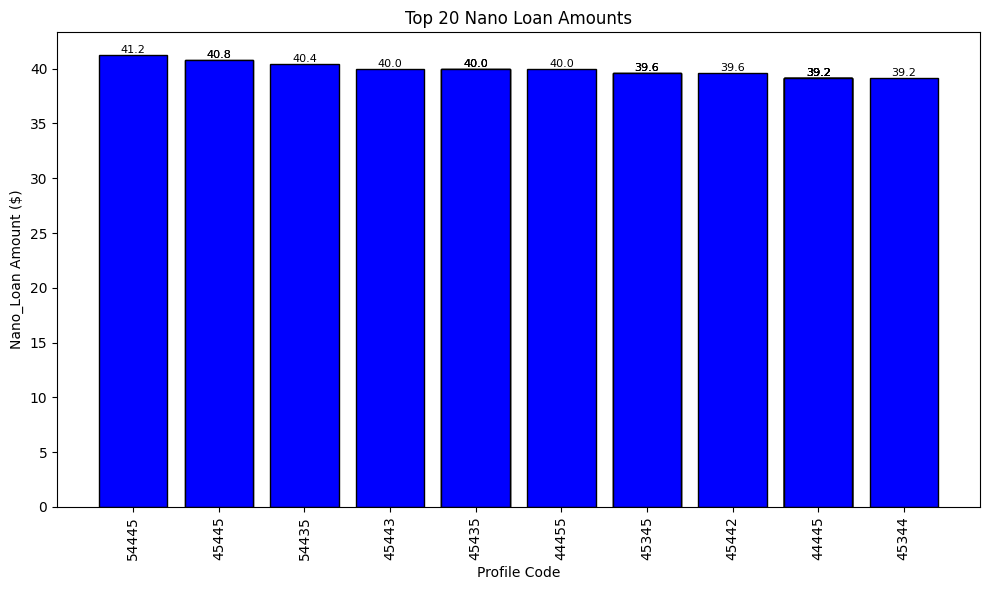

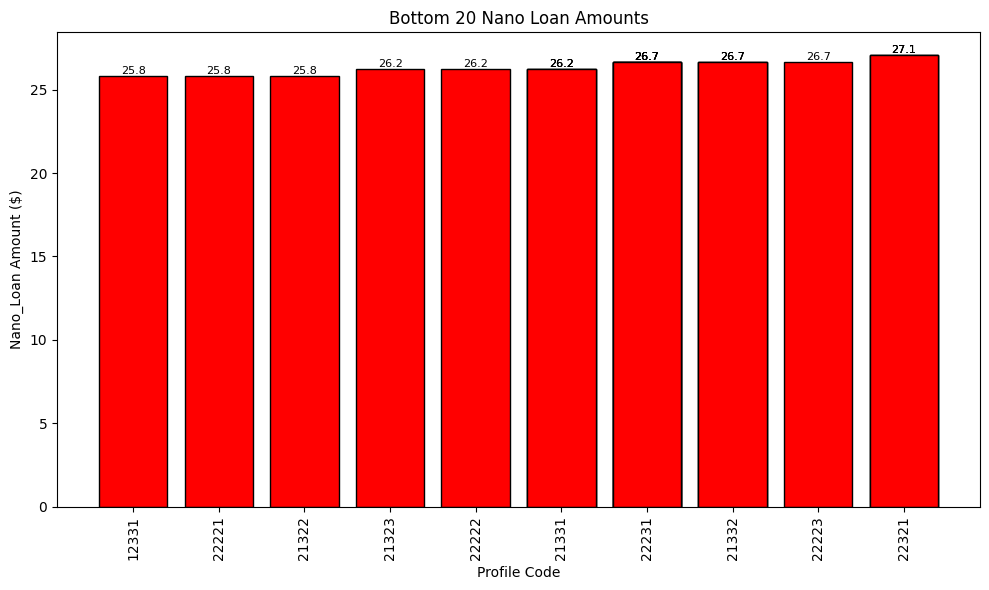

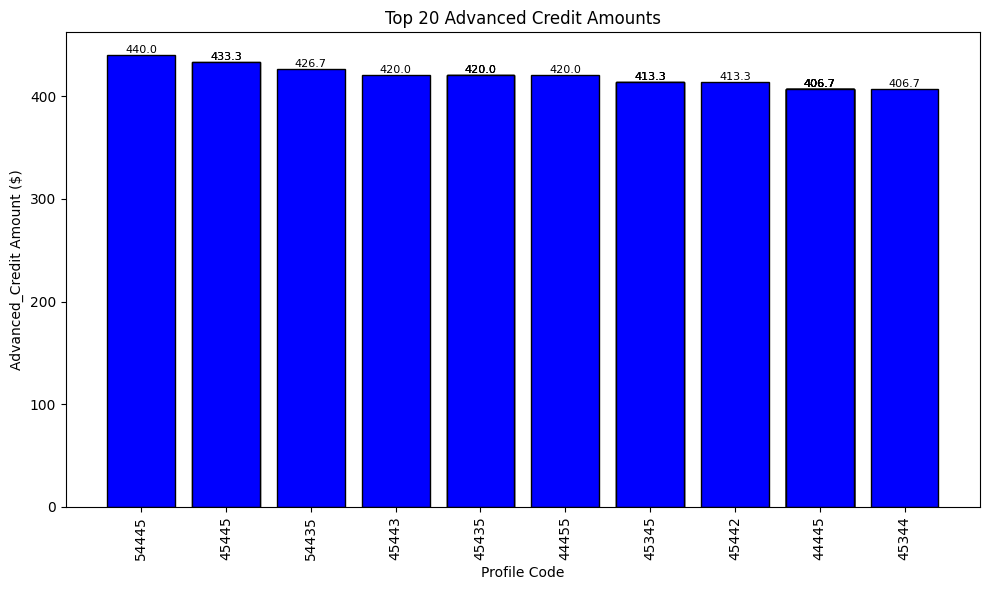

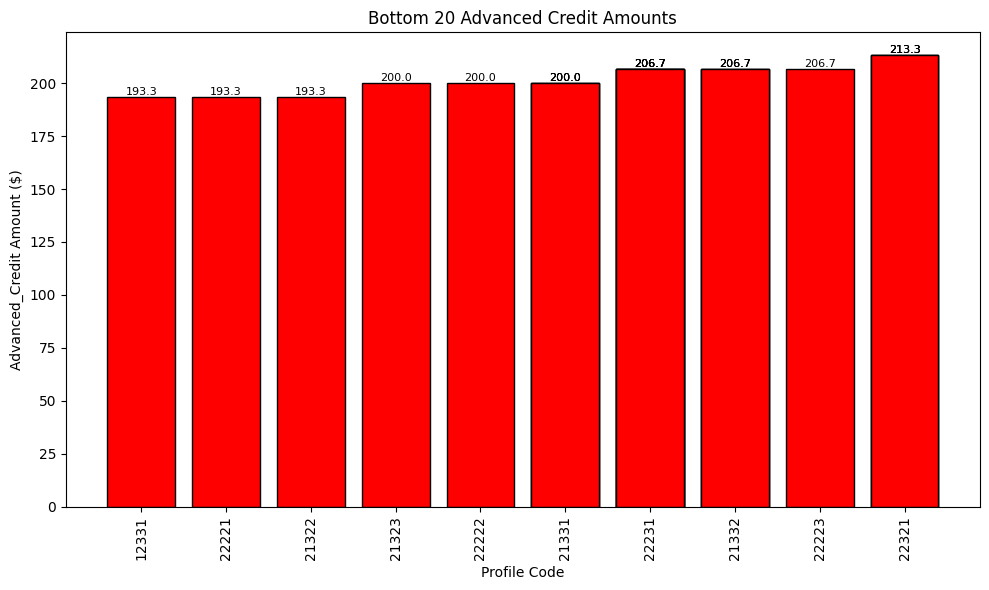

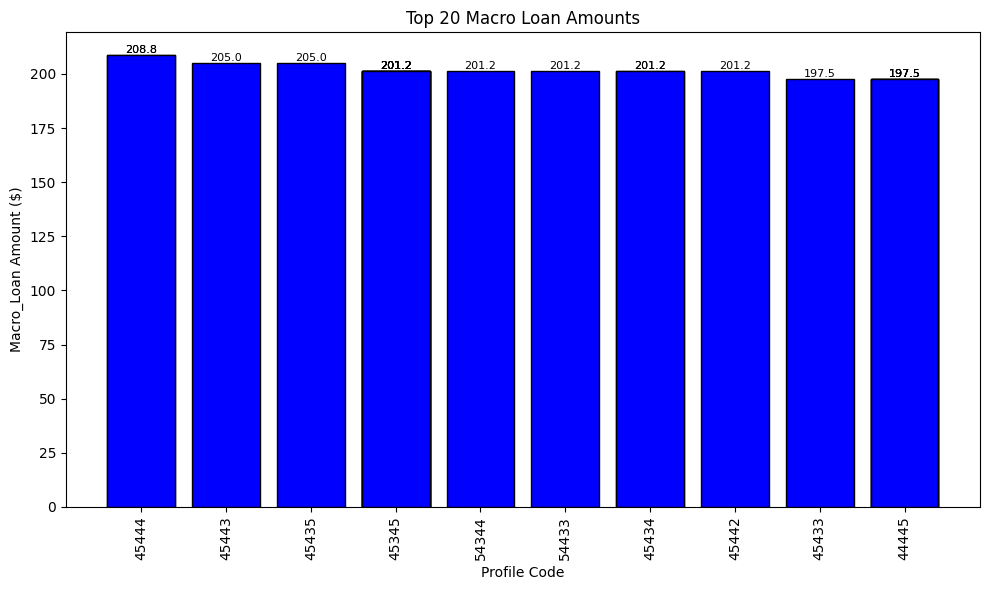

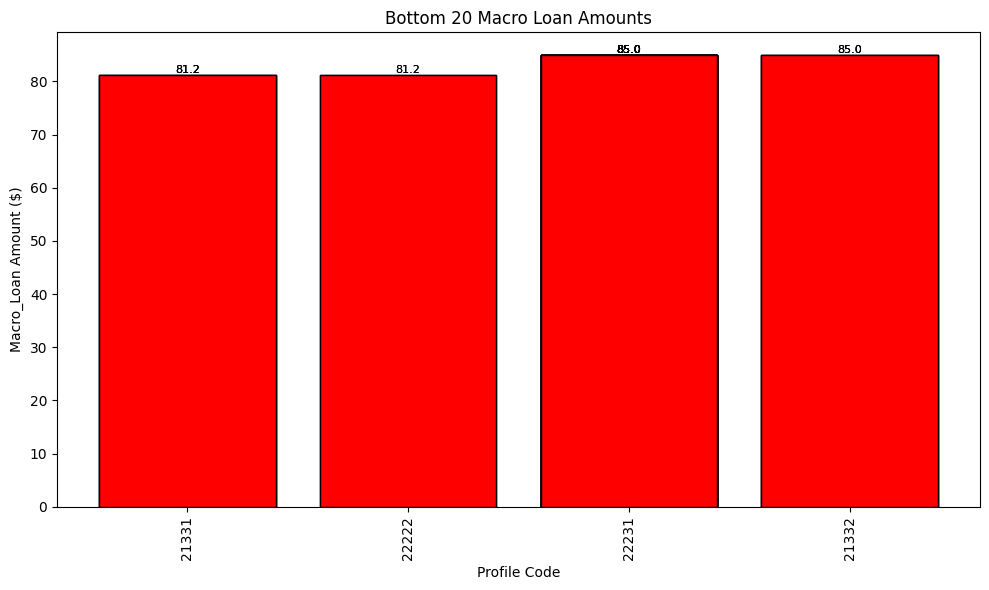

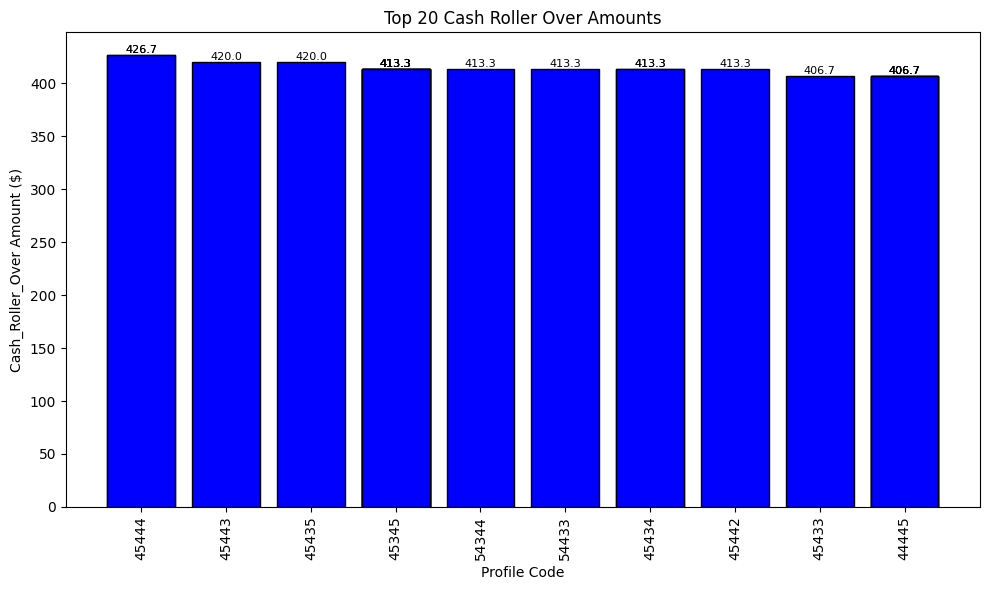

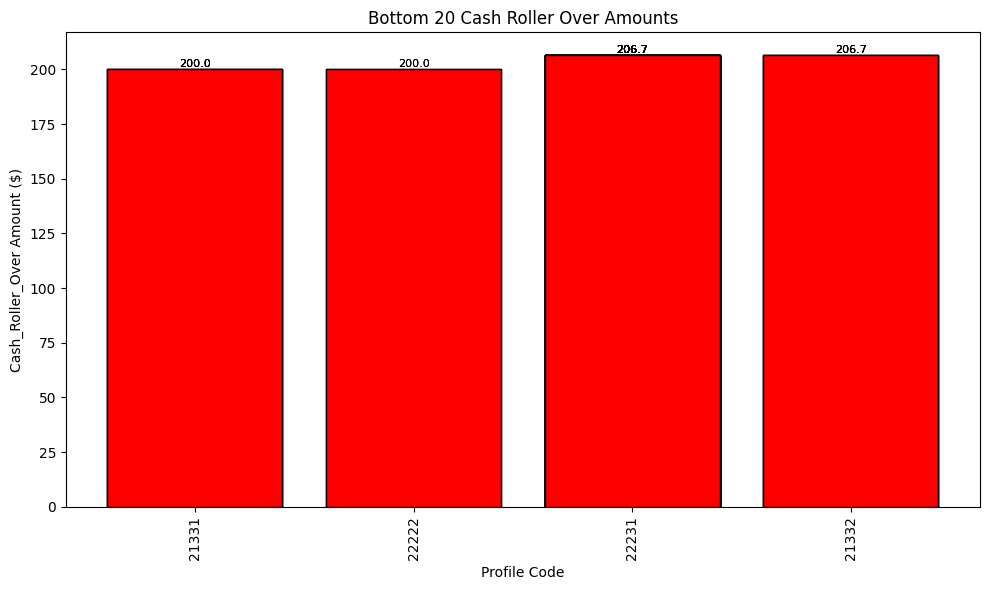

In [13]:
# Define a function to plot the top and bottom 20 amounts for a given credit type with values on the bars
def plot_top_bottom_20_with_values(data, column, title_prefix):
    # Filter out missing values
    valid_data = data.dropna(subset=[column])

    # Get the top 20 largest amounts
    top_20 = valid_data.nlargest(20, column)[['Profile_Code', column]].sort_values(by=column, ascending=False)

    # Get the 20 smallest amounts
    bottom_20 = valid_data.nsmallest(20, column)[['Profile_Code', column]].sort_values(by=column, ascending=True)

    # Plot the top 20 largest amounts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_20['Profile_Code'].astype(str), top_20[column], color='blue', edgecolor='black')
    plt.title(f"Top 20 {title_prefix} Amounts")
    plt.xlabel("Profile Code")
    plt.ylabel(f"{column} Amount ($)")
    plt.xticks(rotation=90)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot the 20 smallest amounts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(bottom_20['Profile_Code'].astype(str), bottom_20[column], color='red', edgecolor='black')
    plt.title(f"Bottom 20 {title_prefix} Amounts")
    plt.xlabel("Profile Code")
    plt.ylabel(f"{column} Amount ($)")
    plt.xticks(rotation=90)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot for each type of credit with values displayed on the bars
credit_types = {
    "Nano_Loan": "Nano Loan",
    "Advanced_Credit": "Advanced Credit",
    "Macro_Loan": "Macro Loan",
    "Cash_Roller_Over": "Cash Roller Over"
}

# Plot for each type of credit with values displayed on the bars
for column, title_prefix in credit_types.items():
    plot_top_bottom_20_with_values(cash_allocated_data, column, title_prefix)

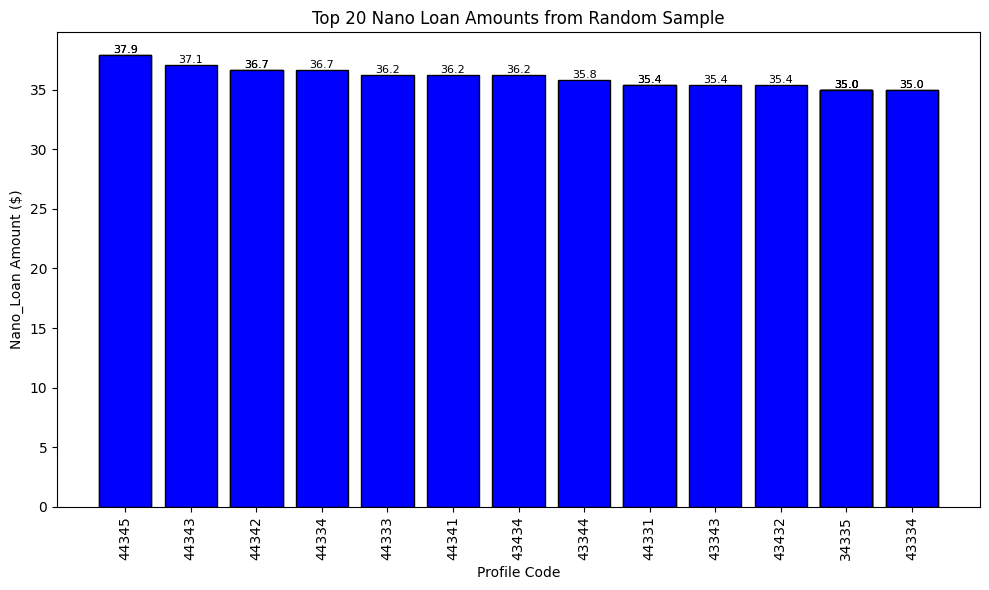

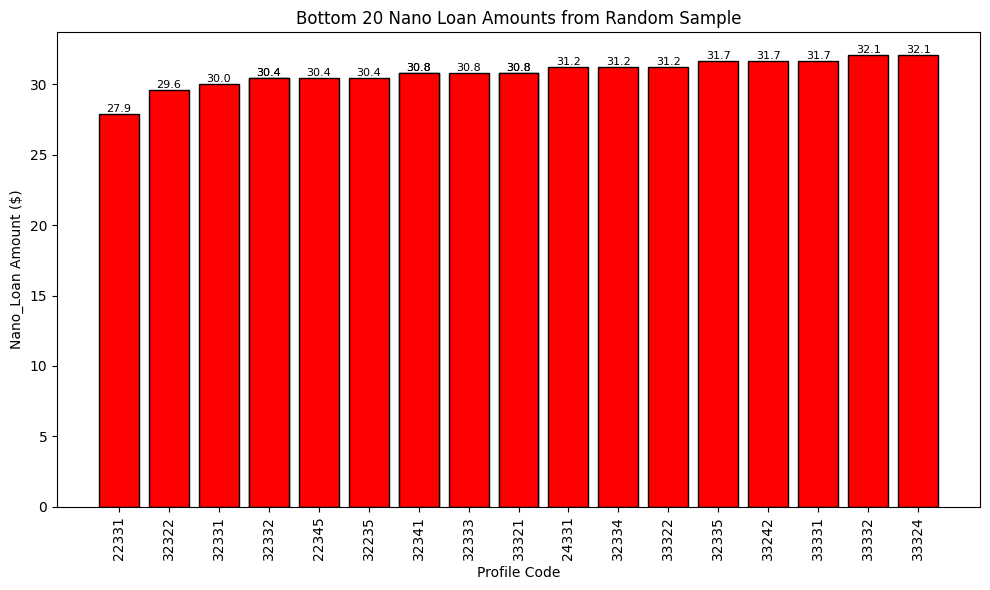

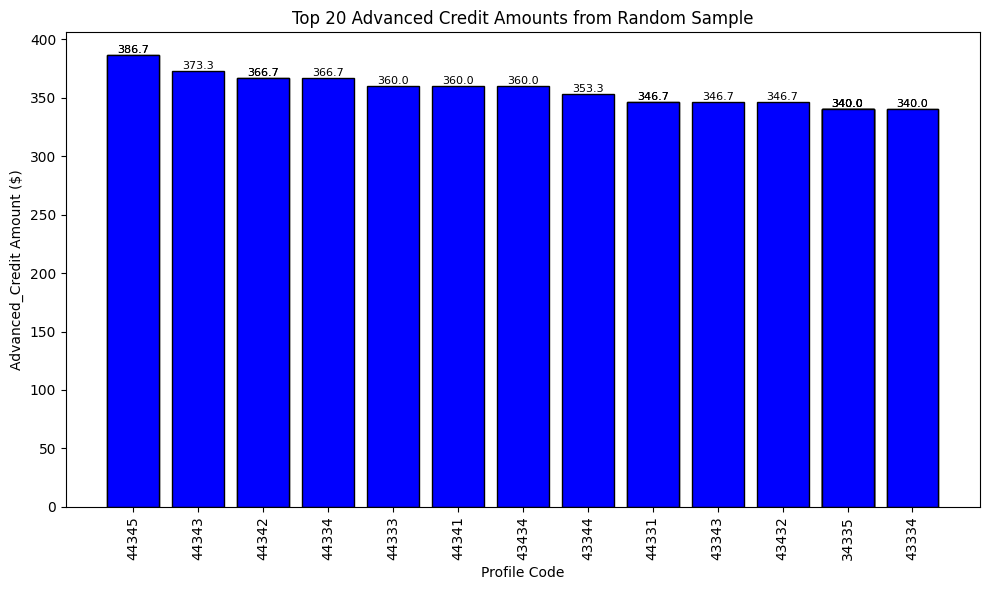

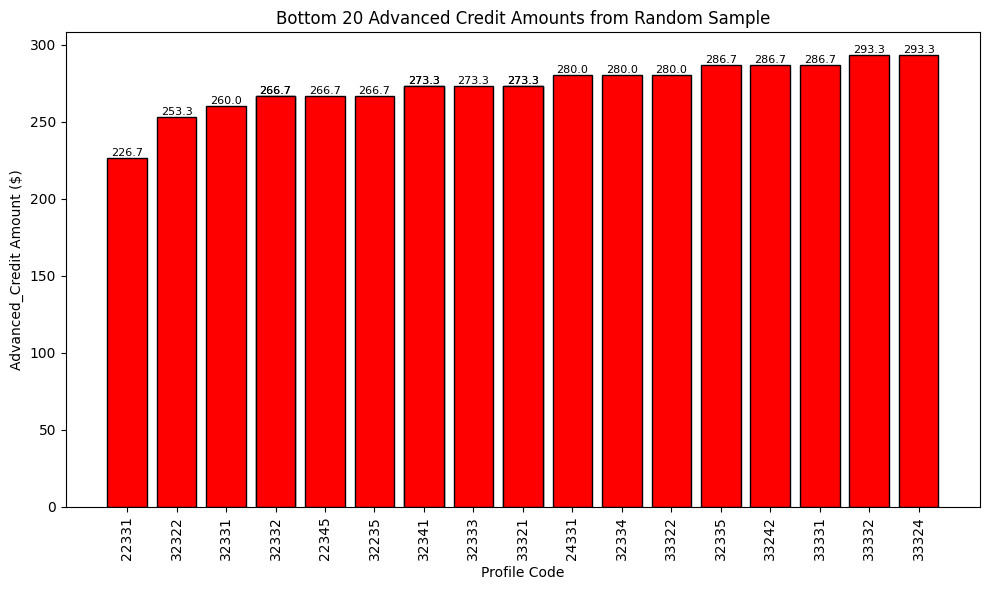

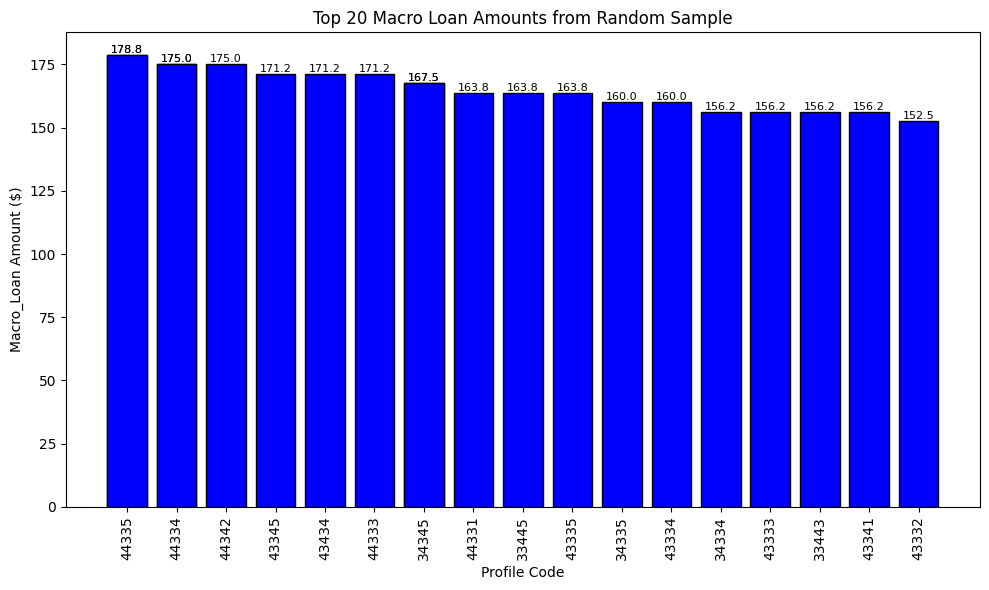

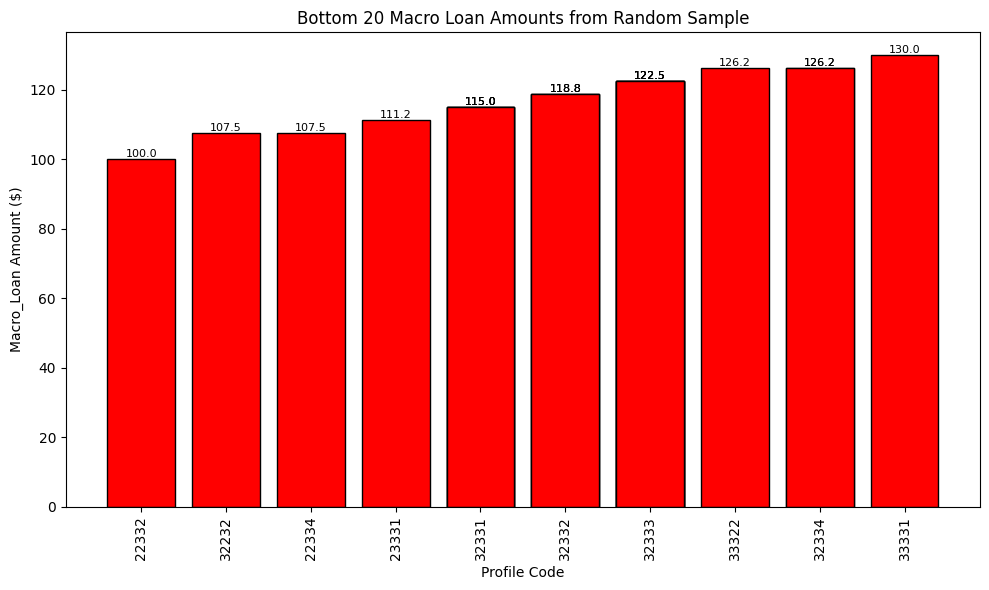

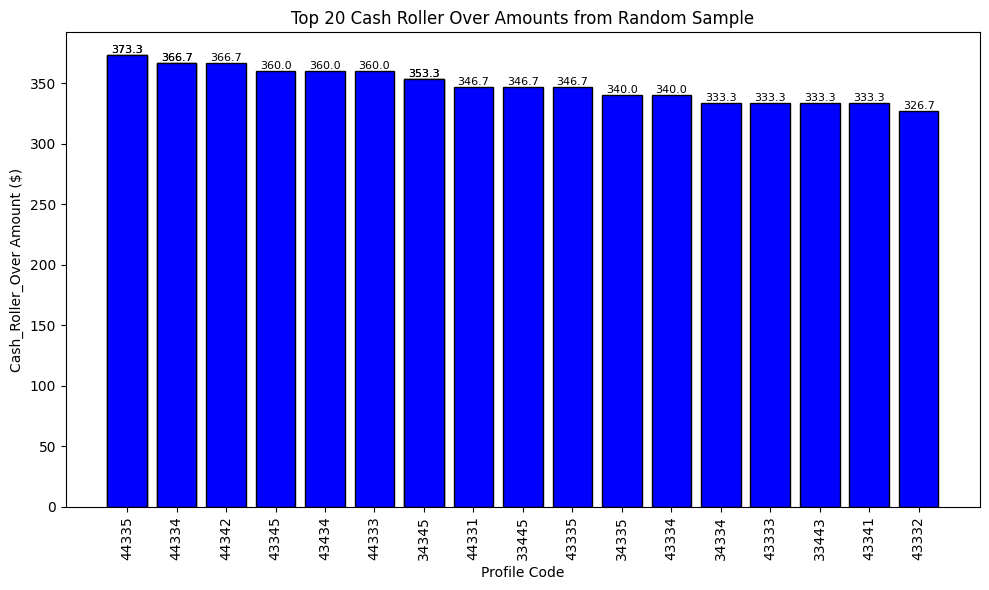

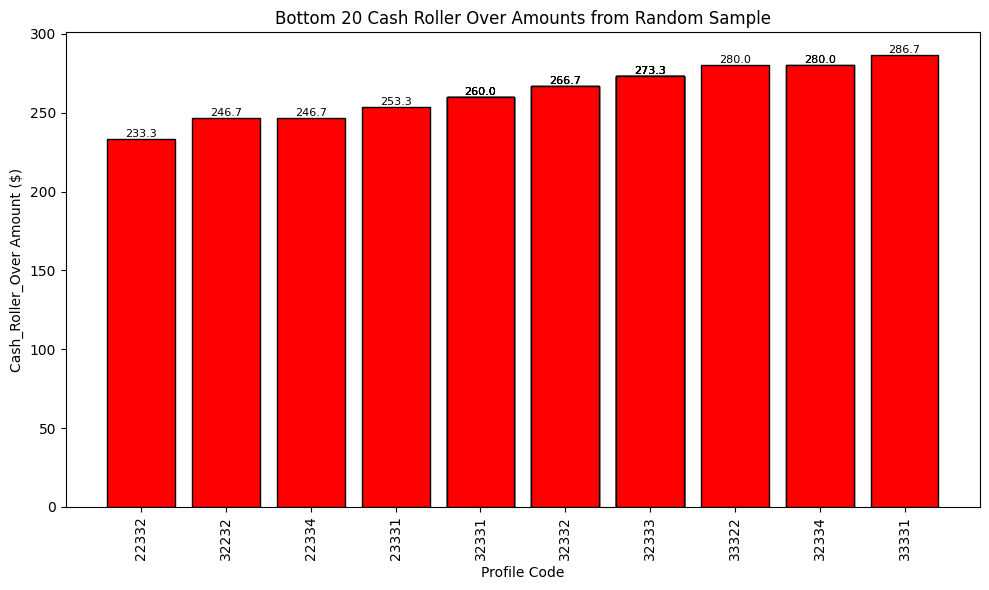

In [14]:
# Define a function to plot the top and bottom 20 amounts from a random sample for a given credit type
def plot_random_sample_top_bottom(data, column, title_prefix, sample_size=100):
    # Filter out missing values
    valid_data = data.dropna(subset=[column])

    # Take a random sample of the specified size
    random_sample = valid_data.sample(n=sample_size, random_state=42)[['Profile_Code', column]]

    # Get the top 20 largest amounts from the random sample
    top_20 = random_sample.nlargest(20, column).sort_values(by=column, ascending=False)

    # Get the 20 smallest amounts from the random sample
    bottom_20 = random_sample.nsmallest(20, column).sort_values(by=column, ascending=True)

    # Plot the top 20 largest amounts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_20['Profile_Code'].astype(str), top_20[column], color='blue', edgecolor='black')
    plt.title(f"Top 20 {title_prefix} Amounts from Random Sample")
    plt.xlabel("Profile Code")
    plt.ylabel(f"{column} Amount ($)")
    plt.xticks(rotation=90)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot the 20 smallest amounts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(bottom_20['Profile_Code'].astype(str), bottom_20[column], color='red', edgecolor='black')
    plt.title(f"Bottom 20 {title_prefix} Amounts from Random Sample")
    plt.xlabel("Profile Code")
    plt.ylabel(f"{column} Amount ($)")
    plt.xticks(rotation=90)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot for each type of credit
credit_types = {
    "Nano_Loan": "Nano Loan",
    "Advanced_Credit": "Advanced Credit",
    "Macro_Loan": "Macro Loan",
    "Cash_Roller_Over": "Cash Roller Over"
}

for column, title_prefix in credit_types.items():
    plot_random_sample_top_bottom(cash_allocated_data, column, title_prefix)